In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

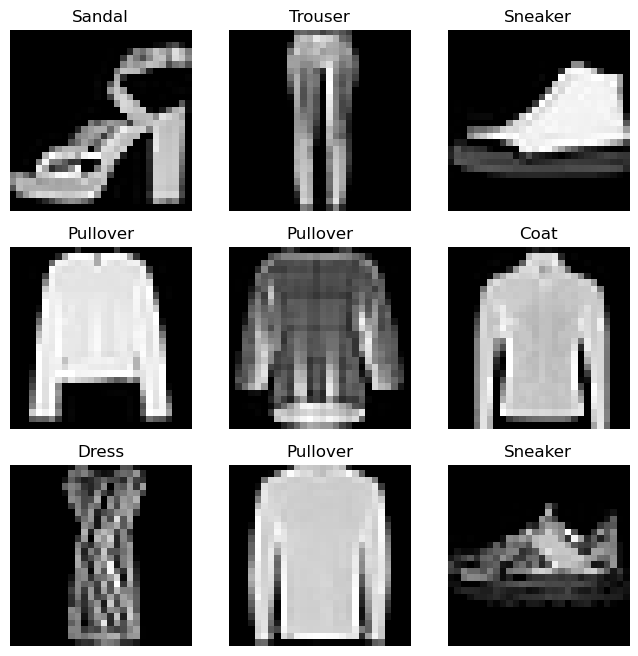

In [4]:
#We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.
import matplotlib.pyplot as plt
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file.

In [6]:
import pandas as pd
import os
from torchvision.io import decode_image
class CustomImageDataset(Dataset):
    def __init__(self,annotations_file,img_dir,transform = None,target_transform=None):
          self.img_labels = pd.read_csv(annotations_file)
          self.img_dir = img_dir
          self.transform = transform
          self.target_transform = target_transform
    def __len__(self):
     return len(self.img_label)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        Image = decode_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            image = self.target_transform(label)
        return image,label


     

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [7]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size = 64,shuffle = True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


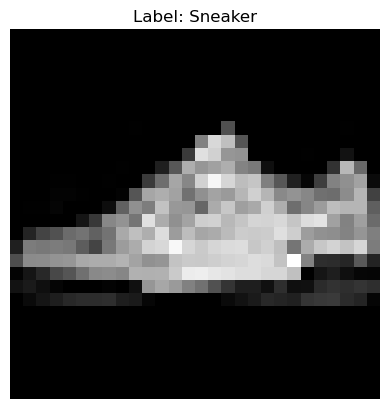

In [16]:
import matplotlib.pyplot as plt

# Get one batch
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Pick a sample image
i = 2
img = train_features[i].squeeze()  # shape [28, 28]
label = train_labels[i]

# Plot
plt.imshow(img, cmap="gray")
plt.title(f"Label: {labels_map[label.item()]}")
plt.axis("off")
plt.show()
